In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [19]:
dfs = []
for w in ["win", "wfn", "wpgs", ""]:
    for seed in range(5):
        for opt in ["sgd", "std"]:
            try:
                w_text = f"{w}_" if len(w) > 0 else ""
                tmp_df = pd.read_csv(f"../results/ga_diabetes_{opt}_{w_text}{seed}.csv")
                tmp_df["seed"] = seed
                tmp_df["w"] = w if len(w) > 0 else "no w"
                tmp_df["opt"] = opt
                dfs.append(tmp_df)
            except FileNotFoundError:
                pass
df = pd.concat(dfs, ignore_index=True)
df.head()

,iteration,max_fitness,test_accuracy,time,seed,w,opt
0,0.0,-3.548749,-4.521123,0.000000,0,win,sgd
1,1.0,-3.209445,-4.091221,4.578942,0,win,sgd
2,2.0,-3.119273,-3.977015,4.499662,0,win,sgd
3,3.0,-3.044572,-3.882209,4.552120,0,win,sgd
4,4.0,-2.966370,-3.783052,4.526593,0,win,sgd


In [20]:
final_df = df[df["iteration"] == max(df["iteration"])]

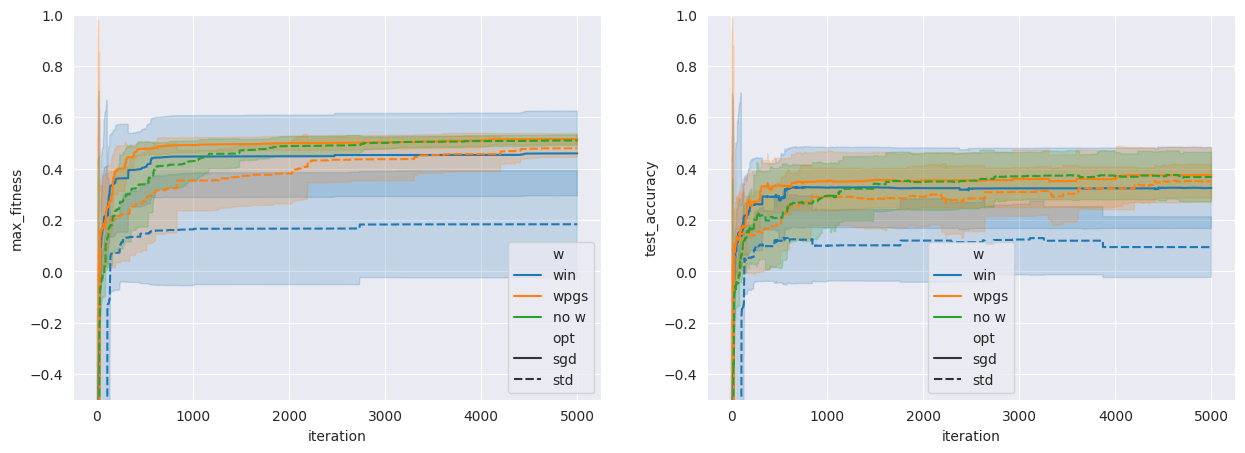

In [33]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))
for idx, y in enumerate(["max_fitness", "test_accuracy"]):
    sns.lineplot(df, x="iteration", y=y, hue="w", style="opt", errorbar="sd", ax=axes[idx])
    axes[idx].set_ylim([-0.5, 1])
plt.show()

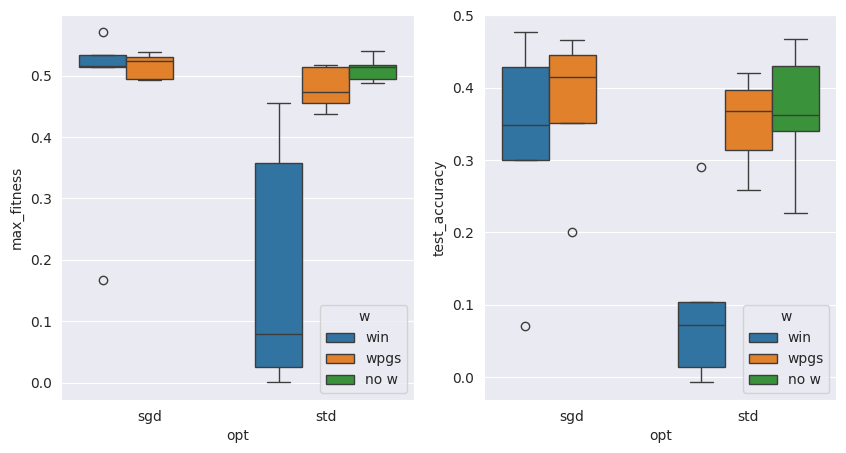

In [32]:
f, axes = plt.subplots(1, 2, figsize=(10, 5))
for idx, y in enumerate(["max_fitness", "test_accuracy"]):
    sns.boxplot(final_df, x="opt", y=y, hue="w", ax=axes[idx])
plt.show()